- Maheshvaran S
- DS205229119
- Lab6. Predictive Analytics for Hospitals 

 ### Step1. [Import dataset] 
- Using Pandas, import “diabetes.csv” file and print properties such as head, shape, columns, dtype, info and value_counts. 

In [1]:
import pandas as pd

data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
data.shape

(768, 9)

In [3]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
data.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [6]:
data.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

### Step2. [Identify relationships between feature] 
- Create a Heatmap for the dataset and understand the data 

<AxesSubplot:>

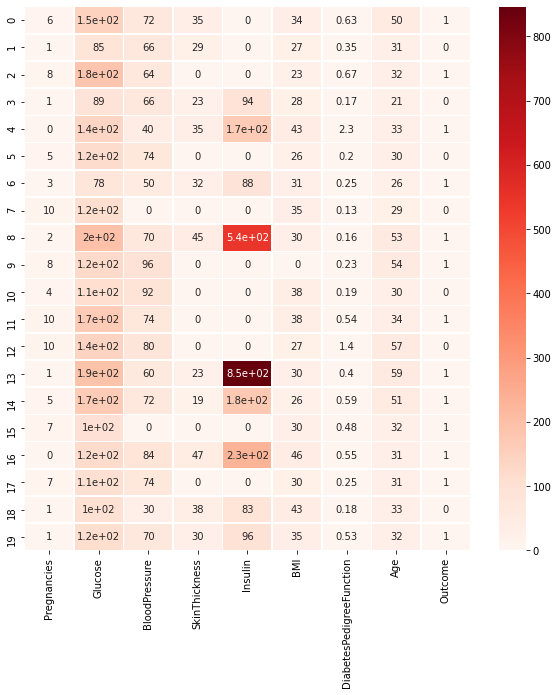

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(data.head(20), cmap='Reds',annot=True, linewidth=.5)

### Step3. [Prediction using one feature]
- Will older people become diabetic? 
- Create LogisticRegression model, train with “Age” as X and “Outcome” feature as y. 
- Print model parameter values: coef_ and intercept_ 
- Query: A person is 60 years old. Will he be diabetic? 
- Use model parameters and find function value. Your code will be as below. 
     * lrf = logreg.coef_ * 60 + logreg.intercept_ 
     * from scipy.special import expit 
     * expit(lrf) 
- If your output > 0.5, YES he will become diabetic. Otherwise, NO, he will not be diabetic.

In [8]:
X = data[['Age']]

In [9]:
y = data['Outcome']

In [10]:
from sklearn.linear_model import LogisticRegression

lrm1 = LogisticRegression()
lrm1.fit(X, y)

LogisticRegression()

In [11]:
lrm1.coef_

array([[0.04202466]])

In [12]:
lrm1.intercept_

array([-2.04744865])

In [13]:
year_old = [[60]]
lrm1.predict(year_old)

array([1], dtype=int64)

- Use model parameters and find function value

In [14]:
lrf = lrm1.coef_ * 60 + lrm1.intercept_
from scipy.special import expit
if expit(lrf) > 0.5:
    print('YES, he will become diabetic')
else:
    print("NO, he will not be diabetic")

YES, he will become diabetic


### Step4. [Prediction using many features] 

- Will Glucose, BMI and Age values make someone diabetic?
- Select the three features 'Glucose', 'BMI' and 'Age' from your dataset, call it as X
- Create a new LogisticRegression model, train with X and ‘Outcome’ as y. 
- Query: For a person, glucose=150, bmi=30, age=40. Will he be diabetic? 
   - Find the value of expit() as before. Output will be: 0.5208271643241003

In [15]:
X1 = data[['Age', 'BMI', 'Glucose']]

In [16]:
lrm2 = LogisticRegression()

In [17]:
lrm2.fit(X1, y)

LogisticRegression()

In [18]:
lrm2.predict([[150, 30, 40]])

array([0], dtype=int64)

In [19]:
lrm2.predict_proba([[150, 30, 40]])

array([[0.53053646, 0.46946354]])

### Step5. [Build LoR model with all features] 
- Create LoR model, train it with X_train and y_train values 
- Now, compute and print its AUC value 
- Can we get this AUC value with limited set of good features?. Yes, we are going to find with 'Forward Selection Procedure'.

In [20]:
import warnings

warnings.filterwarnings('ignore')

In [21]:
X3 = data.drop('Outcome', axis=1)
lrm3 = LogisticRegression()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X3,y,train_size=0.8,test_size=0.2)

lrm3.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred = lrm3.predict(X_test)

In [23]:
from sklearn.metrics import roc_auc_score

print("LoR AUC ", roc_auc_score(y_test, y_pred))

LoR AUC  0.6607407407407406


### Step6. [Forward Selection Procedure] Now, you have to find and select a good set of features with the best AUC score. The algorithm is 
#### Forward stepwise variable selection procedure 
1. Empty set 
2. Find best variable v 
3. Find best variable v in combination with v 
4. Find best variable v in combination with v , v 
5. ...
6. (Until all variables are added or until predefined number of variables is added) 


#### Implementation Steps of the forward stepwise procedure 
1. Define a function get_auc() that calculates AUC given a certain set of variables 
2. Define a function best_next() that returns next best variable in combination with current variables 
3. Loop until desired number of variables

In [24]:
type(data.columns)

pandas.core.indexes.base.Index

In [25]:
def get_auc(var,tar,df):
    fX = df[var]
    fy = df[tar]
    logreg = LogisticRegression()
    logreg.fit(fX,fy)
    pred=logreg.predict_proba(fX)[:,1]
    auc_val = roc_auc_score(y,pred)
    return auc_val
get_auc(["BMI","Glucose"],["Outcome"],data)

0.8109328358208956

In [26]:
get_auc(['Pregnancies', 'BloodPressure', 'SkinThickness'],["Outcome"],data)

0.6444962686567164

In [27]:
def next_best(current,cand,tar,df):
    best_auc = -1
    best_var = None
    for i in cand:
        auc_v = get_auc(current+[i],tar,df)
        if auc_v>=best_auc:
            best_auc = auc_v
            best_var = i
    return best_var

In [28]:
tar = ["Outcome"]
current = ['Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
cand = ['Pregnancies', 'BloodPressure', 'SkinThickness'] 
next_var = next_best(current,cand,tar,data)
print(next_var)

SkinThickness


In [29]:
tar = ["Outcome"]
current = []
cand = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
max_num = 5 
num_it = min(max_num,len(cand))
for i in range(0,num_it):
    next_var = next_best(current,cand,tar,data)
    current = current + [next_var]
    cand.remove(next_var)
    print("Variable added in step " + str(i+1)  + " is " + next_var + ".")
print(current)

Variable added in step 1 is Glucose.
Variable added in step 2 is BMI.
Variable added in step 3 is Pregnancies.
Variable added in step 4 is DiabetesPedigreeFunction.
Variable added in step 5 is BloodPressure.
['Glucose', 'BMI', 'Pregnancies', 'DiabetesPedigreeFunction', 'BloodPressure']


### Step7. [Plot Line graph of AUC values and select cut-off] 
- Split your dataset equally for training and testing 
- Plot AUC values for each variable. The graph will appear as below.

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X3,y,test_size = 0.5,stratify =y)

In [31]:
pred2 = lrm3.predict_proba(X_test)

In [32]:
train = pd.concat([X_train,y_train], axis=1)
test = pd.concat([X_test,y_test], axis=1)

In [33]:
def auc_train_test(variables,target,train,test):
    X_train = train[variables]
    X_test = test[variables]
    Y_train = train[target]
    Y_test = test[target]
    logreg = LogisticRegression()
    
    # Fit the model on train data
    logreg.fit(X_train, Y_train)
    
    # Calculate the predictions both on train and test data
    predictions_train = logreg.predict_proba(X_train)[:,1]
    predictions_test = logreg.predict_proba(X_test)[:,1]
    
    # Calculate the AUC both on train and test data
    auc_train = roc_auc_score(Y_train, predictions_train)
    auc_test = roc_auc_score(Y_test,predictions_test)
    return(auc_train, auc_test)

In [34]:
auc_values_train = []
auc_values_test = []
variables_evaluate = []

# Iterate over the variables in variables
for v in X3.columns:
  
    # Add the variable
    variables_evaluate.append(v)
    
    # Calculate the train and test AUC of this set of variables
    auc_train, auc_test = auc_train_test(variables_evaluate,["Outcome"],train,test)
    
    # Append the values to the lists
    auc_values_train.append(auc_train)
    auc_values_test.append(auc_test)

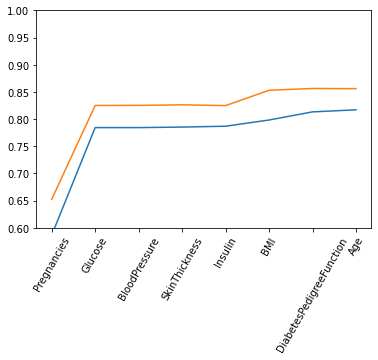

In [35]:
# Make plot of the AUC values
import matplotlib.pyplot as plt
import numpy as np

x = np.array(range(0,len(auc_values_train)))
my_train = np.array(auc_values_train)
my_test = np.array(auc_values_test)
plt.xticks(x,X3.columns,rotation=60)
plt.plot(x,my_train)
plt.plot(x,my_test)
plt.ylim((0.6,1.0))
plt.show()

##### The cut-off line can be drawn at the 4th variable. It gives the best AUC score around 0.81. Therefore, it will be sufficient to use only the first 4 features for training and testing. Otherwise, AUC is going down gradually. 

### Step8. [Draw Cumulative Gain Chart and Lift Chart] 

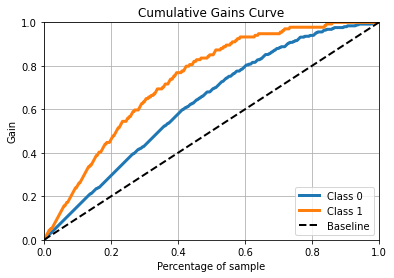

<Figure size 504x504 with 0 Axes>

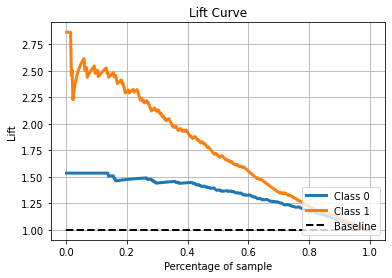

In [36]:
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test,pred2)
plt.show()

plt.figure(figsize=(7,7))
skplt.metrics.plot_lift_curve(y_test,pred2)
plt.show()